In [303]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl
mpl.rcParams['figure.dpi']= 150

import warnings
warnings.filterwarnings('ignore')

## I : We consider a model with (k+1) attributes. The first k are equal and all independent with the last one.

## What will happen to the prediction given by the Naive Bayes Classifier ?

In [26]:
def f(I,k):
    a=np.power((1-I),k)
    b=np.power(I,k)
    return a/(a+b)

Text(0, 0.5, 'q_x')

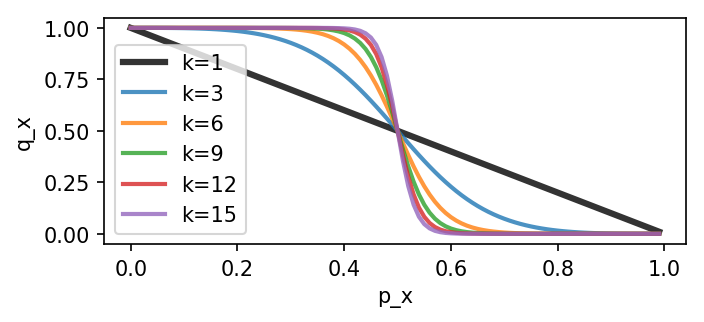

In [51]:
plt.figure(figsize=(5,2))
I=np.arange(0,1,0.01)
plt.plot(I,f(I,1),label=f'k={1}',alpha=0.8,c='black',lw=3)
for k in range (3,18,3):
    plt.plot(I,f(I,k),label=f'k={k}',alpha=0.8,lw=2)
    plt.legend()

plt.xlabel('p_x')
plt.ylabel('q_x')
#plt.savefig('No_ind.png')

## II : Optimality of a Bayesian Classifier with disjunctive or conjunctive forms

We can consider for instance the following disjunction :

## $x_1\wedge x_2 \wedge x_3 \wedge x_4 \wedge x_5 \wedge x_6 \wedge x_7 \wedge x_8 \wedge x_9 \wedge x_{10}$ 

## We assign 1 to $x=(x_1,x_2,...,x_{10})$ if  $x_1=x_2=...=x_{10}=1$ and 0 otherwise

#### We consider that we are in the context described in the article on page 119 for the Theorem 6 : We will use as our dataset all the $2^{10}$ observations from the truth table and we will compare the 0-1 loss obtained with several classifiers against the Naive Bayesian's one.

In [414]:
def assign(X):
    if (X==np.ones(10)).sum()==10:
        return 1
    else:
        return 0

In [415]:
def digit_to_binary(x):
    X=np.zeros(10)
    i=0
    while x!=0:
        i+=1
        X[10-i]=x%2
        x=(x//2)
    return X

In [416]:
X=np.array([digit_to_binary(n) for n in range(0,1024)])
np.random.shuffle(X)
y=np.array([assign(x) for x in X])

In [417]:
from sklearn.model_selection import cross_validate
from sklearn.naive_bayes import BernoulliNB
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA
from sklearn.neighbors import KNeighborsClassifier as knn
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score

def launch_comparison(X,y):
    clf1 = BernoulliNB(alpha=0)
    clf1.fit(X,y)
    y_pred1=clf1.predict(X)
    print('0-1 loss obtained using the Naive Bayes Classifier',1024-accuracy_score(y_pred1,y,False))

    clf2=LDA()
    clf2.fit(X,y)
    y_pred2=clf2.predict(X)
    print('0-1 loss obtained using the LDA Classifier',1024-accuracy_score(y_pred2,y,False))

    clf3=knn(3)
    clf3.fit(X,y)
    y_pred3=clf3.predict(X)
    print('0-1 loss obtained using the 3-NN Classifier',1024-accuracy_score(y_pred3,y,False))

    clf4 = DecisionTreeClassifier()
    clf4.fit(X,y)
    y_pred4=clf4.predict(X)
    print('0-1 loss obtained using a Decision Tree',1024-accuracy_score(y_pred4,y,False))

launch_comparison(X,y)

0-1 loss obtained using the Naive Bayes Classifier 0
0-1 loss obtained using the LDA Classifier 1
0-1 loss obtained using the 3-NN Classifier 1
0-1 loss obtained using a Decision Tree 0


We observe that, indeed, the Naive Bayes Classifier is optimal under the 0-1 loss just like the Decision Tree. This is not surprising since a decision tree is designed to find a set of rules by construction.

Nevertheless, we notice without surprise that, classifiers which use the principle 'Birds fly in flock' didn't succeed in finding the rule which assign 1 to the observation $\underbrace{(1,1,...,1)}_{10}$. They simply associate each observation to 0.

#### Let's see now, how will react the Naive Bayes Classifier in a situation in which the decision rule is more complex.

We can consider for instance the following conjunction of disjunctions :

## $(x_1\wedge x_2 \wedge x_3) \lor (x_4\wedge x_5) \lor (x_6 \wedge x_7 \wedge x_8 \wedge x_9) \lor x_{10}$ 

## We assign 1 to $x=(x_1,x_2,...,x_{10})$ if  $x_1=x_2=x_3=1$ or $x_4=x_5=1$ or $x_6 = x_7 = x_8 = x_9 = 1$ or $x_{10}=1$ and 0 otherwise

#### As before, we will use as our dataset all the $2^{10}$ observations from the truth table and we will compare the 0-1 loss obtained with several classifiers against the Naive Bayesian's one using a 10-fold cross validation for instance.

In [418]:
def assign(X):
    if ((X[0]==X[1]==X[2]==1) or (X[3]==X[4]==1) or (X[5]==X[6]==X[7]==X[8]==1) or (X[9]==1)):
        return 1
    else:
        return 0
    
X=np.array([digit_to_binary(n) for n in range(0,1024)])
np.random.shuffle(X)
y=np.array([assign(x) for x in X])

In [419]:
launch_comparison(X,y)

0-1 loss obtained using the Naive Bayes Classifier 62
0-1 loss obtained using the LDA Classifier 71
0-1 loss obtained using the 3-NN Classifier 17
0-1 loss obtained using a Decision Tree 0


This time, the optimal classifier is the decision tree. This is not a surprise since, as said before, the decision tree is precisely designed to discover set of rules, whatever their complexity. Nevertheless, we see that even the 3-NN achieve a better 0-1 loss than the NBC and so, that it is not anymore optimal if we add some complexity to the prediction rules.

## III - Efficiency of the NBC on small datasets

In [462]:
from sklearn.naive_bayes import GaussianNB

def launch_comparison_datasets(X_train,y_train,X_test,y_test):
    clf1 = GaussianNB()
    clf1.fit(X_train,y_train)
    y_pred1=clf1.predict(X_test)
    print('Accuracy obtained using the Naive Bayes Classifier :',100*accuracy_score(y_pred1,y_test),'%')

    clf2=LDA()
    clf2.fit(X_train,y_train)
    y_pred2=clf2.predict(X_test)
    print('Accuracy obtained using the LDA Classifier :',100*accuracy_score(y_pred2,y_test),'%')

    clf3=knn(3)
    clf3.fit(X_train,y_train)
    y_pred3=clf3.predict(X_test)
    print('Accuracy obtained using the 3-NN Classifier :',100*accuracy_score(y_pred3,y_test),'%')

    clf4 = DecisionTreeClassifier()
    clf4.fit(X_train,y_train)
    y_pred4=clf4.predict(X_test)
    print('Accuracy obtained using a Decision Tree :',100*accuracy_score(y_pred4,y_test),'%')

In [476]:
import sklearn.datasets as data
from sklearn.model_selection import train_test_split as tts


def efficiency_on_dataset(dataset):
    X=dataset['data']
    y=dataset['target']
    X_train, X_test, y_train, y_test = tts(X, y, test_size=0.25, random_state=0)
    launch_comparison_datasets(X_train,y_train,X_test,y_test)

print('SMALL DATASET : size_max = 569')
print('Iris dataset')
data_1=data.load_iris()
print('------------')
efficiency_on_dataset(data_1)
print('------------')
print('Wine dataset')
print('------------')
data_2=data.load_wine()
efficiency_on_dataset(data_2)
print('------------')
print('Breast cancer')
data_3=data.load_breast_cancer()
print('------------')
efficiency_on_dataset(data_3)

SMALL DATASET : size_max = 569
Iris dataset
------------
Accuracy obtained using the Naive Bayes Classifier : 100.0 %
Accuracy obtained using the LDA Classifier : 97.36842105263158 %
Accuracy obtained using the 3-NN Classifier : 97.36842105263158 %
Accuracy obtained using a Decision Tree : 97.36842105263158 %
------------
Wine dataset
------------
Accuracy obtained using the Naive Bayes Classifier : 93.33333333333333 %
Accuracy obtained using the LDA Classifier : 97.77777777777777 %
Accuracy obtained using the 3-NN Classifier : 73.33333333333333 %
Accuracy obtained using a Decision Tree : 93.33333333333333 %
------------
Breast cancer
------------
Accuracy obtained using the Naive Bayes Classifier : 93.7062937062937 %
Accuracy obtained using the LDA Classifier : 97.2027972027972 %
Accuracy obtained using the 3-NN Classifier : 92.3076923076923 %
Accuracy obtained using a Decision Tree : 89.5104895104895 %


In [499]:
import pandas as pd

data_4=pd.read_csv('mushrooms.csv')

In [510]:
y=data_4['class'].astype("category").cat.codes

X=pd.DataFrame()
for column in data_4.columns:
    X[column]=data_4[column].astype("category").cat.codes

In [598]:
X_train

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
5832,1,2,3,9,0,2,1,0,0,7,...,1,0,4,0,2,1,2,1,5,1
601,0,5,3,4,1,3,1,0,0,10,...,3,7,7,0,2,1,4,3,5,1
1601,0,2,2,3,0,5,1,1,0,4,...,0,7,7,0,2,1,0,2,0,1
4941,1,5,0,3,0,2,1,0,0,2,...,1,0,6,0,2,1,2,1,4,4
7492,1,2,3,4,0,2,1,0,1,0,...,1,6,7,0,2,1,0,7,4,0
2103,0,5,0,2,1,5,1,0,0,7,...,2,6,3,0,2,1,4,3,5,0
1421,0,5,2,8,0,5,1,1,0,7,...,0,7,7,0,2,1,0,2,3,1
7349,0,3,2,3,0,5,1,1,0,7,...,2,7,7,0,2,2,4,7,3,1
4945,0,3,2,5,1,5,1,0,0,10,...,2,2,2,0,2,2,0,7,1,6
3464,0,2,0,2,1,5,1,0,0,7,...,2,3,3,0,2,1,4,3,5,0


In [597]:
from sklearn.naive_bayes import MultinomialNB
X_train, X_test, y_train, y_test = tts(X, y, test_size=0.25,random_state=0)

print('Performance of a bigger dataset : Size =',len(y))

clf1 = MultinomialNB()
clf1.fit(X_train,y_train)
y_pred1=clf1.predict(X_test)
print('Accuracy obtained using the Naive Bayes Classifier :',100*accuracy_score(y_pred1,y_test),'%')

clf2=LDA()
clf2.fit(X_train,y_train)
y_pred2=clf2.predict(X_test)
print('Accuracy obtained using the LDA Classifier :',100*accuracy_score(y_pred2,y_test),'%')

clf3=knn(3)
clf3.fit(X_train,y_train)
y_pred3=clf3.predict(X_test)
print('Accuracy obtained using the 3-NN Classifier :',100*accuracy_score(y_pred3,y_test),'%')

clf4 = DecisionTreeClassifier()
clf4.fit(X_train,y_train)
y_pred4=clf4.predict(X_test)
print('Accuracy obtained using a Decision Tree :',100*accuracy_score(y_pred4,y_test),'%')

Performance of a bigger dataset : Size = 8124
Accuracy obtained using the Naive Bayes Classifier : 97.29197439684884 %
Accuracy obtained using the LDA Classifier : 94.6824224519941 %
Accuracy obtained using the 3-NN Classifier : 99.9507631708518 %
Accuracy obtained using a Decision Tree : 100.0 %
